In [12]:
!pip install -q scikit-learn xgboost

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("blood.csv")

In [21]:
# Features and target
X = df.drop('Class', axis=1)
y = df['Class'].replace({1: 0, 2: 1})

In [22]:
# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Making train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# **Training Multiple Classifiers**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.7667
Random Forest Accuracy: 0.7533
SVM Accuracy: 0.7733
Gradient Boosting Accuracy: 0.7867
XGBoost Accuracy: 0.7667
KNN Accuracy: 0.7867


# **Evaluating the Best Model**


✅ Best Model: Gradient Boosting with Accuracy: 0.7867

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       114
           1       0.58      0.39      0.47        36

    accuracy                           0.79       150
   macro avg       0.70      0.65      0.67       150
weighted avg       0.77      0.79      0.77       150



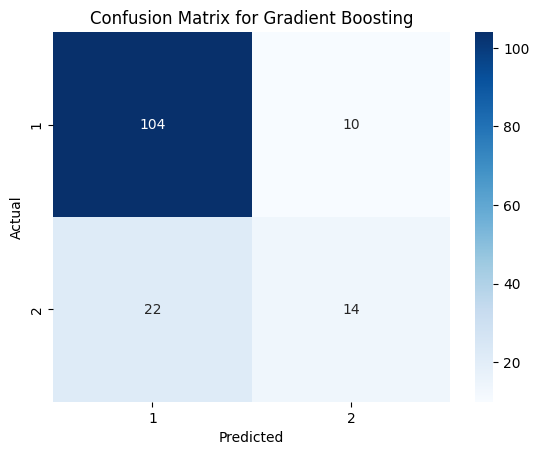

In [26]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2], yticklabels=[1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()
